## Recurrence, Depth and High-dimensional data
# Gradient descent notebook

In this notebook you will learn the fudementals of how gradient descent works. You will first begin by exploring a simple linear regression example. You need to write the funtion to update to the parameters using the local gradient. Then you will use this to write the same thing for more complicated functions. Along the way, please read and learn to use the plotting tools in this notebook. They will come in very handy.

*Please execute the cell bellow in order to initialize the notebook environment*

In [2]:
%autosave 0
# %matplotlib inline
%matplotlib notebook

from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import mod3

plt.rcParams.update({'figure.figsize': (5.0, 4.0), 'lines.linewidth': 2.0})

Autosave disabled


### Linear Regression

The following cell contains the equation for our function, *f*, which is the function of a line with optional noise. There is also a function which allows us to generate simulated data, *generate_data*. 

In [3]:
# linear regression model

def f(x, w, xi=0):
    """
    # arguments
    #  x: domain
    #  w: the parameters (weights), which are the slope and offset
    #  xi: (optional) noise
    """
    return w[0] + w[1]*x + xi

def generate_data(n, w, x_sup, sigma):
    # arguments
    #  n: number of data points
    #  w: weights
    #  x_sup: support of x (the range of x)
    #  sigma: the std of the noise
    
    x = x_sup[0] + (x_sup[1]-x_sup[0])*np.random.rand(n)
    xi = sigma*np.random.randn(n)
    
    y = f(x, w, xi=xi)
    
    return (x, y)

### Generate data

To understand how gradient descent works, we are going to generate data sets to use.

In [4]:
# data params
n = 500
w = (2, 0.5)
# range of the data
x_sup = (0, 10)
sigma = 1.

# generate data
x, y = generate_data(n, w, x_sup, sigma)

Plot the data to see how the data likes around the generating function. You should get something that looke like:
<img src="fig/wb_2_lin_data.png" alt="Linear regreassion data" title="Sample Data" />


In [6]:
# plot data
x_range = np.linspace(-1.5*max(x_sup), 1.5*max(x_sup), num=500)

fig = plt.figure()
plt.plot(x_range, f(x_range, w), 'c2', linewidth=4, alpha=0.8)
mod3.plot_data(x, y)
plt.show()

<IPython.core.display.Javascript object>

ValueError: Unrecognized character C in format string

We know how to calculate the optimal solution for linear regresssion. We use Ordinary Lease Squares which is equivilant to Maximum Likelilihood Estimation under the assumption of IID Gaussian noise. We have provided the OLS solution in the fuction 'mod3.ols(x, y)' which takes the data as inputs.

In [26]:
# optimal linear regression solution

w_ols = mod3.ols(x, y)

# print params
print 'w0: ', format(float(w[0]), '.3f'), '\t->\t w0_ols:', format(float(w_ols[0]), '.3f')
print 'w1: ', format(float(w[1]), '.3f'), '\t->\t w1_ols:', format(float(w_ols[1]), '.3f')

w0:  2.000 	->	 w0_ols: 2.062
w1:  0.500 	->	 w1_ols: 0.486


### Gradient descent

Now we want to find these parameters using the method of gradient descent. To do this you need to write a few functions. The first is the loss function (or the cost function).

This function needs to take the data *x* and *y* and the current parameters *w* of the function we are trying to train. In this case, our function is a line and you know how to calculate the loss under the OLS assumption. (Hint: workbook 1)

You will also need to determine what the gradients of the parameters *w* are. In this case, you need to determine the partial derivitices of the loss function with respect to slope and offset parameters. Then you will need to write a function that returns a new estimated set of parameters *w* that shift *w* in the direction that minimizes the loss by some small amount.  

In [27]:
# gradient descent functions

# loss for our function 'f'
def loss(x, y, w):
    # arguments:
    #  x, y: observations
    #  w: parameter vector
    # return:
    #  the OLS loss [also called error or cost]
    
    return 0.5/len(x)*np.sum((f(x, w)-y)**2)

# the updade function for our function 'f', using the gradient of 'f'
def update(x, y, w, eta):
    # arguments:
    #  x, y: observations
    #  w: parameter vector
    #  eta: the step size 
    # return:
    #  new parameter estimates    
    
    w0 = w[0] - eta*np.sum(f(x, w)-y)/n
    w1 = w[1] - eta*np.sum((f(x, w)-y)*x)/n
    
    return (w0, w1)

## 'Training' our function to fit the data

We will now train the function (estimate the parameters) by updating our estimates iteratively. You will see the loss over time in the first plot, the parameter estimate shifting (with the loss surface) in the second plot and the actual predicted function in the third plot. It should look like this with the default parameters:
<img src="fig/wb_2_lin_train.png" alt="Linear regreassion data" title="Sample Data" />


<IPython.core.display.Javascript object>


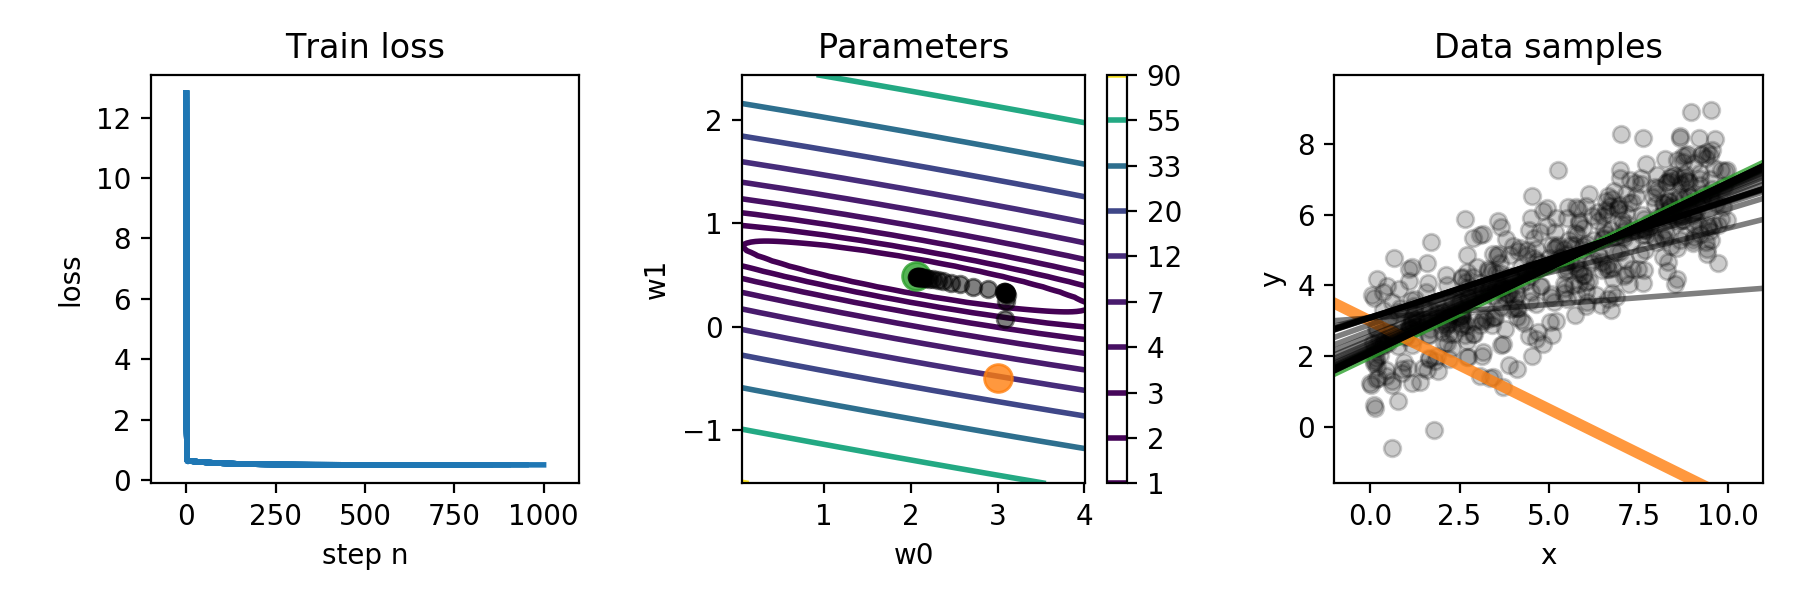

w0:  2.000 	->	 w0_ols:  2.062 	->	 w0_est:  0.484
w1:  0.500 	->	 w1_ols:  0.486 	->	 w1_est:  0.484


In [28]:
# training parameters
epochs = 1000  # the number of iterations
eta = 0.02     # the step size

# an initial guess
w_est = (w[0]+1, w[1]-1)

# the initial loss
train_loss = [loss(x, y, w_est)]

# setup plots
gs = gridspec.GridSpec(1, 3)

fig = plt.figure(figsize=(9, 3))

fig1 = plt.subplot(gs[0])
mod3.plot_loss(train_loss, epochs)

fig2 = plt.subplot(gs[2])
mod3.plot_data(x, y)
plt.plot(x_range, f(x_range, w_ols), 'C2', linewidth=4, alpha=0.8)
plt.plot(x_range, f(x_range, w_est), 'C1', linewidth=4, alpha=0.8)

fig3 = plt.subplot(gs[1])
mod3.plot_loss_contour(x, y, w_ols, loss)
plt.plot(w_ols[0], w_ols[1], 'C2o', markersize=10, alpha=0.8)
plt.plot(w_est[0], w_est[1], 'C1o', markersize=10, alpha=0.8)

plt.tight_layout()
fig.show()
fig.canvas.draw()

# train with gradient descent
for epoch in range(epochs):

    w_est = update(x, y, w_est, eta)
    
    train_loss += [loss(x, y, w_est)]
    
    if epoch<10 or epoch%50==0 or epoch==epochs-1:
        fig1.plot(range(len(train_loss)), train_loss, 'C0', linewidth=2)
        fig2.plot(x_range, w_est[0] + w_est[1]*x_range, 'k', alpha=0.5)
        fig3.plot(w_est[0], w_est[1], 'ko', alpha=0.5)
        fig.canvas.draw()

# print params
print 'w0: ', format(float(w[0]), '.3f'), '\t->\t w0_ols: ', \
    format(float(w_ols[0]), '.3f'), '\t->\t w0_est: ', format(float(w_est[1]), '.3f')
print 'w1: ', format(float(w[1]), '.3f'), '\t->\t w1_ols: ', \
    format(float(w_ols[1]), '.3f'), '\t->\t w1_est: ', format(float(w_est[1]), '.3f')

### What is happening?

**How many iterations are needed?**

**How does changing the step size (eta) effect the training?**

**How does the gradient descent estimate compare to the OLS estimate?**

**How does this change if you change the noise level in the data?**

# Non-linear regression

Next try training the parameters of a non-linear function. You will use the following exponential function in this exercise:

$$w_{0} + e^{2-w_{1}x} + \mathcal{N}(0, \sigma^{2})$$

Generate some data and look at it. What is different? Why might it be different to fit this function?

<img src="fig/wb_2_exp_data.png" alt="Exponential regreassion data" title="Sample Data" />


<IPython.core.display.Javascript object>


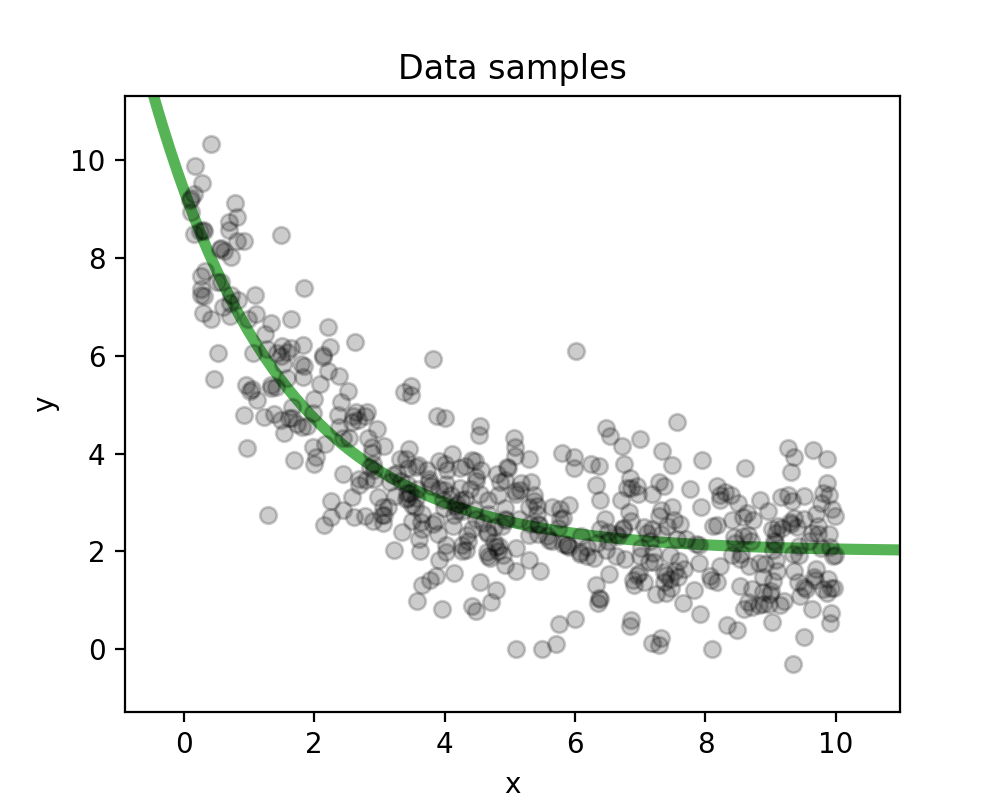

In [29]:
# non-linear regression model

# the exponential function with tau and offset
def f(x, w, xi=0):
    # arguments
    #  x: domain
    #  w: parameters
    #  xi: noise (optional)
    
    return w[0] + np.exp(2 - w[1]*x) + xi

# data params
n = 500
w = (2., 0.5)
x_sup = (0, 10)
sigma = 1.

# generate data
x, y = generate_data(n, w, x_sup, sigma)

# plot data
x_range = np.linspace(-1.5*max(x_sup), 1.5*max(x_sup), num=500)

fig = plt.figure()
plt.plot(x_range, f(x_range, w), 'C2', linewidth=4, alpha=0.8)
mod3.plot_data(x, y)
plt.show()

You need to write the new update function for the exponential. Then we will use the same iterative training to estimate the parameters. It should look like this:

<img src="fig/wb_2_exp_fit.png" alt="Exponential regreassion data" title="Sample Data" />


In [30]:
# gradient descent

# update function for the exponential fit
def update(x, y, w, eta):
    # Arguments:
    #  x, y: observations
    #  w: parameters
    #  eta: step size
    # Return: new parameter estimates

    w0_new = w[0] - eta*np.sum(f(x, w)-y)/n
    w1_new = w[1] - eta*np.sum((f(x, w)-y)*(-x*(f(x, w)-w[0])))/n
    
    return (w0_new, w1_new)

<IPython.core.display.Javascript object>


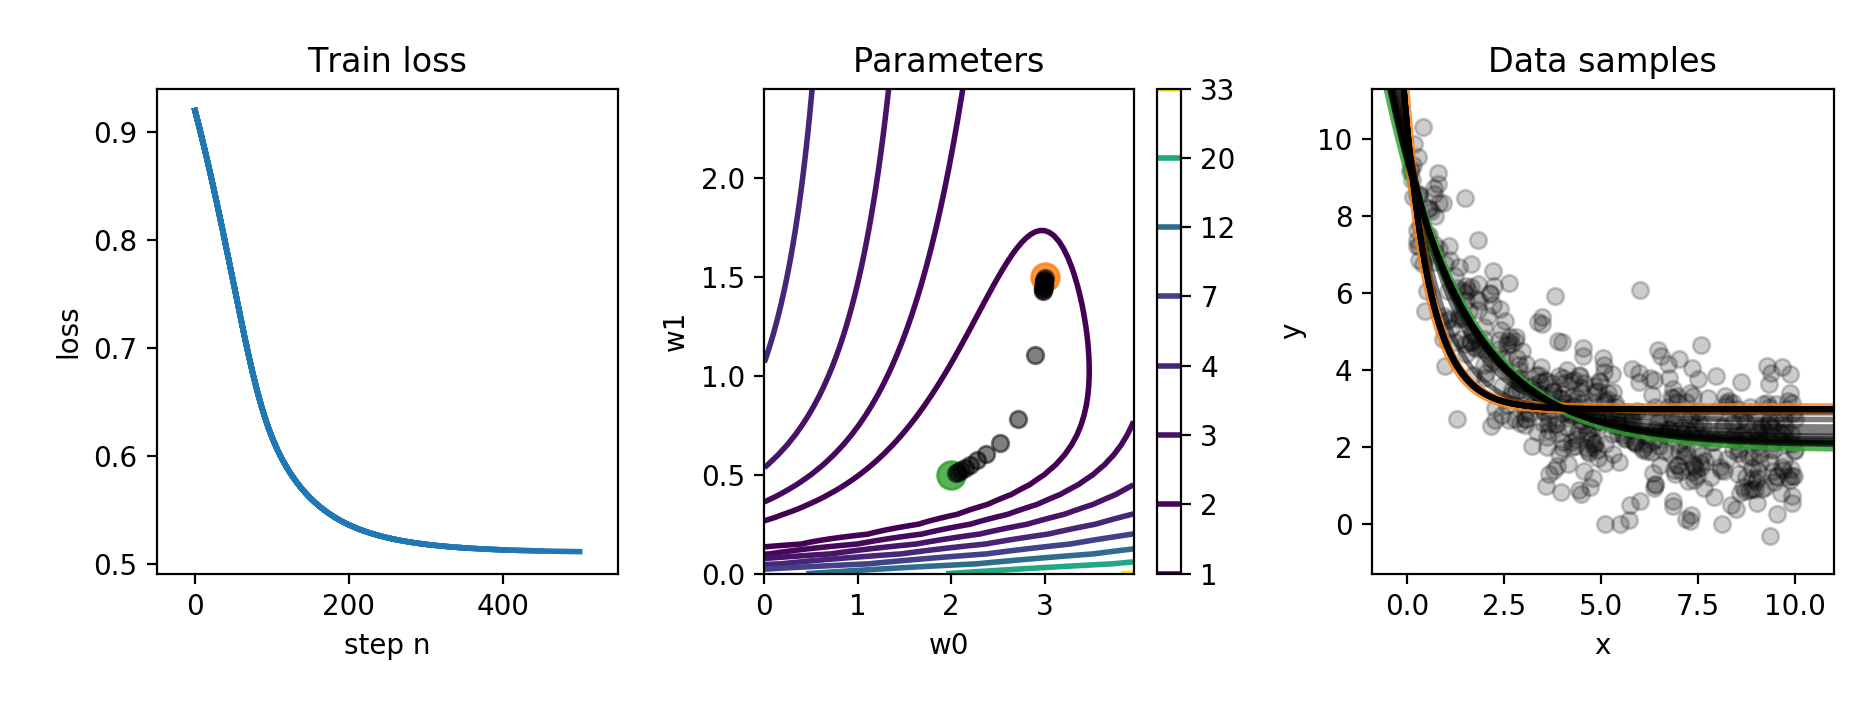

w0:  2.000 	->	 w0_est:  0.507
w1:  0.500 	->	 w1_est:  0.507


In [31]:
# train parameters
epochs = 500
eta = 0.02
n_batch = n
w_est = (w[0]+1, w[1]+1)

train_loss = [loss(x, y, w_est)]

# setup plots
gs = gridspec.GridSpec(1, 3)

fig = plt.figure(figsize=(9, 3))

fig1 = plt.subplot(gs[0])
mod3.plot_loss(train_loss, epochs)

w1_range = np.arange(0, w[1]+2, 0.05)
fig2 = plt.subplot(gs[1])
mod3.plot_loss_contour(x, y, w, loss, w_range=(None,w1_range))
plt.plot(w[0], w[1], 'C2o', markersize=10, alpha=0.8)
plt.plot(w_est[0], w_est[1], 'C1o', markersize=10, alpha=0.8)

fig3 = plt.subplot(gs[2])
mod3.plot_data(x, y)
plt.plot(x_range, f(x_range, w), 'C2', linewidth=4, alpha=0.8)
plt.plot(x_range, f(x_range, w_est), 'C1', linewidth=4, alpha=0.8)

plt.tight_layout()
fig.show()
fig.canvas.draw()

# train with gradient descent
for epoch in range(epochs):

    w_est = update(x, y, w_est, eta)
    
    train_loss += [loss(x, y, w_est)]
    
    if epoch<10 or epoch%50==0 or epoch==epochs-1:
        fig1.plot(range(len(train_loss)), train_loss, 'C0', linewidth=2)
        fig2.plot(w_est[0], w_est[1], 'ko', alpha=0.5)
        fig3.plot(x_range, f(x_range, w_est), 'k', alpha=0.5)
        fig.canvas.draw()

# print params
print 'w0: ', format(float(w[0]), '.3f'), '\t->\t w0_est: ', format(float(w_est[1]), '.3f')
print 'w1: ', format(float(w[1]), '.3f'), '\t->\t w1_est: ', format(float(w_est[1]), '.3f')

### What is different

Why is the fiting different between the two models?

Which model is more stable to fit?

Is the step size more or less important?

## A composed function

To understand gradient descent and 'back-propogation' we need to understand how a composite function works. When you have $f(g(x))$ you need to differentiate using the chain rule. This is the core of back-propagation. We calculate the partial derivitives at each step of the composite function and do this all the way back until we get to the inner most function. In the case of a neural network, the function can be complex (e.g. not just a simple composite like function) but the idea is the same. NOTE: the *f* we are using here is the second one we wrote (assuming you've been executing the code above) and so is the exponential function which replaces the original linear one.) Let's start by looking at the data. It should look like this:
<img src="fig/wb_2_composite_data.png" alt="Exponential regreassion data" title="Sample Data" />


<IPython.core.display.Javascript object>


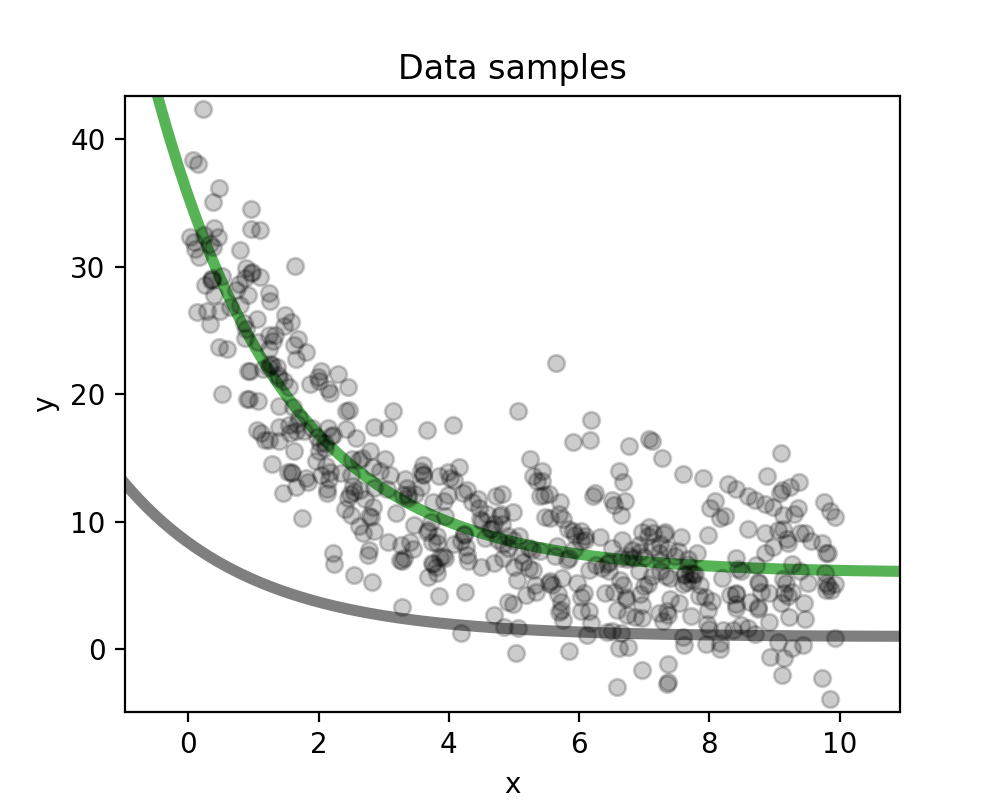

In [32]:
# composed non-linear regression model

def f1(x, w, xi=0):
    
    return w[2] + w[3]*f(x, w, xi=xi)

def generate_data(n, w, x_sup, sigma):
    
    x = x_sup[0] + (x_sup[1]-x_sup[0])*np.random.rand(n)
    xi = sigma*np.random.randn(n)
    
    y = f1(x, w, xi=xi)
    
    return (x, y)

# data params
n = 500
w = (1, 0.5, 2, 4)
x_sup = (0, 10)
sigma = 1.

# generate data
x, y = generate_data(n, w, x_sup, sigma)

# plot data
x_range = np.linspace(-1.5*max(x_sup), 1.5*max(x_sup), num=500)

fig = plt.figure()
plt.plot(x_range, f(x_range, w), 'k', linewidth=4, alpha=0.5)
plt.plot(x_range, f1(x_range, w), 'C2', linewidth=4, alpha=0.8)
mod3.plot_data(x, y)
plt.show()

Now you need to write the new update function.
<img src="fig/wb_2_composite_fit.png" alt="Exponential regreassion data" title="Sample Data" />


In [33]:
# gradient descent

def update(x, y, w, eta):
    # Arguments:
    #  x, y: observations
    #  w: parameters
    #  eta: step size
    # Return: new parameter estimates

    if type(eta) is float:
        eta=[eta, eta, eta, eta]
    
    w0_new = w[0] - eta[0]*np.sum(f1(x, w)-y)*w[3]/n
    w1_new = w[1] - eta[1]*np.sum((f1(x, w)-y)*w[3]*(-x*(f(x, w)-w[0])))/n
    w2_new = w[2] - eta[2]*np.sum(f1(x, w)-y)/n
    w3_new = w[3] - eta[3]*np.sum((f1(x, w)-y)*f(x, w))/n
    
    return (w0_new, w1_new, w2_new, w3_new)

def loss(x, y, w):
    
    return 0.5/len(x)*np.sum((f1(x, w)-y)**2)

<IPython.core.display.Javascript object>


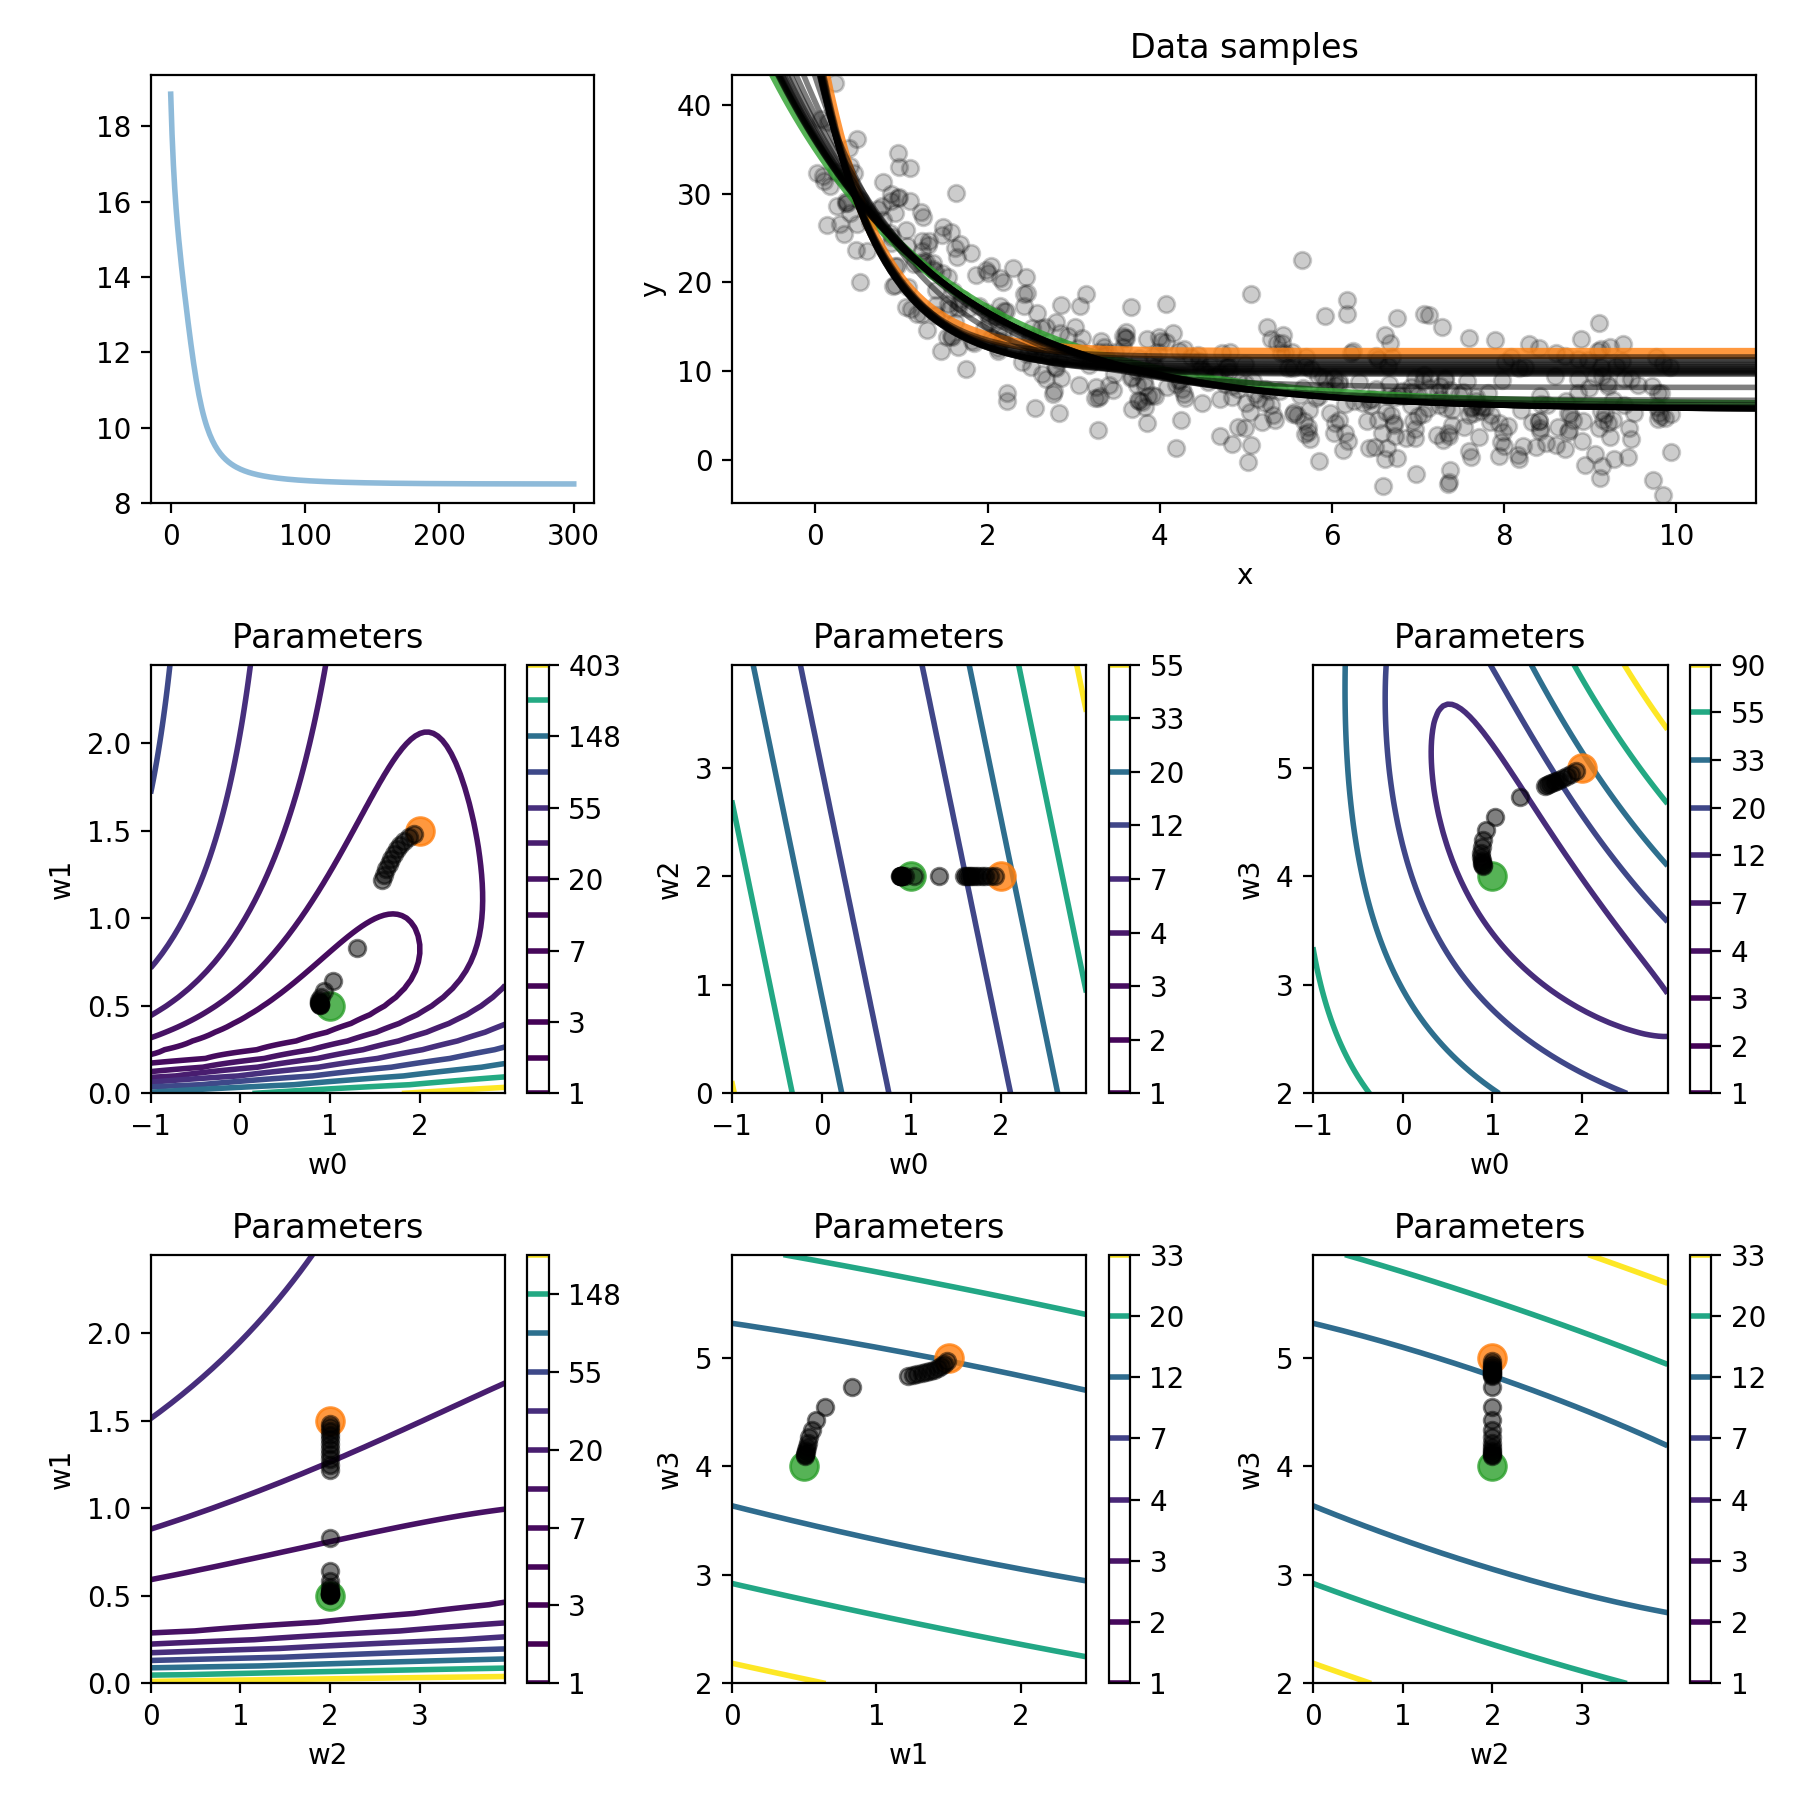

b0:	1.000 	->	 b0_est 0.892
b1:	0.500 	->	 b1_est 0.506
b2:	2.000 	->	 b2_est 2.000
b3:	4.000 	->	 b3_est 4.091


In [34]:
# train parameters
epochs = 300
eta = 0.005
w_est = (w[0]+1, w[1]+1, w[2], w[3]+1)

train_loss = [loss(x, y, w_est)]
reload(mod3)
# setup plots
gs = gridspec.GridSpec(3, 3)

fig = plt.figure(figsize=(9, 9))

fig1 = plt.subplot(gs[0,0])
mod3.plot_loss(train_loss, epochs)

fig2 = plt.subplot(gs[0,1:])
mod3.plot_data(x, y)
plt.plot(x_range, f1(x_range, w), 'C2', linewidth=4, alpha=0.8)
plt.plot(x_range, f1(x_range, w_est), 'C1', linewidth=4, alpha=0.8)

f_loss = lambda x, y, z: loss(x, y, (z[0], z[1], w[2], w[3]))
w1_range = np.arange(0, w[1]+2, 0.05)
fig4 = plt.subplot(gs[1,0])
mod3.plot_loss_contour(x, y, (w[0], w[1]), f_loss, w_range=(None, w1_range))
plt.plot(w[0], w[1], 'C2o', markersize=10, alpha=0.8)
plt.plot(w_est[0], w_est[1], 'C1o', markersize=10, alpha=0.8)

f_loss = lambda x, y, z: loss(x, y, (z[0], w[1], z[1], w[3]))
fig5 = plt.subplot(gs[1,1])
mod3.plot_loss_contour(x, y, (w[0], w[2]), f_loss, ax_labels=('w0','w2'))
plt.plot(w[0], w[2], 'C2o', markersize=10, alpha=0.8)
plt.plot(w_est[0], w_est[2], 'C1o', markersize=10, alpha=0.8)

f_loss = lambda x, y, z: loss(x, y, (z[0], w[1], w[1], z[1]))
fig6 = plt.subplot(gs[1,2])
mod3.plot_loss_contour(x, y, (w[0], w[3]), f_loss, ax_labels=('w0','w3'))
plt.plot(w[0], w[3], 'C2o', markersize=10, alpha=0.8)
plt.plot(w_est[0], w_est[3], 'C1o', markersize=10, alpha=0.8)

f_loss = lambda x, y, z: loss(x, y, (w[0], z[1], z[0], w[3]))
fig7 = plt.subplot(gs[2,0])
mod3.plot_loss_contour(x, y, (w[2], w[1]), f_loss, ax_labels=('w2','w1'), w_range=(None, w1_range))
plt.plot(w[2], w[1], 'C2o', markersize=10, alpha=0.8)
plt.plot(w_est[2], w_est[1], 'C1o', markersize=10, alpha=0.8)

f_loss = lambda x, y, z: loss(x, y, (w[0], w[1], z[0], z[1]))
fig8 = plt.subplot(gs[2,1])
mod3.plot_loss_contour(x, y, (w[1], w[3]), f_loss, ax_labels=('w1','w3'), w_range=(w1_range, None))
plt.plot(w[1], w[3], 'C2o', markersize=10, alpha=0.8)
plt.plot(w_est[1], w_est[3], 'C1o', markersize=10, alpha=0.8)

f_loss = lambda x, y, z: loss(x, y, (w[0], w[1], z[0], z[1]))
fig9 = plt.subplot(gs[2,2])
mod3.plot_loss_contour(x, y, (w[2], w[3]), f_loss, ax_labels=('w2','w3'))
plt.plot(w[2], w[3], 'C2o', markersize=10, alpha=0.8)
plt.plot(w_est[2], w_est[3], 'C1o', markersize=10, alpha=0.8)

plt.tight_layout()
fig.show()
fig.canvas.draw()


# train with gradient descent
for epoch in range(epochs):
        
    w_est = update(x, y, w_est, [eta, eta, 0, eta])
    
    train_loss += [loss(x, y, w_est)]
    
    if epoch<=10 or epoch%25==0 or epoch==epochs-1:
        fig1.cla()
        fig1.plot(range(len(train_loss)), train_loss, 'C0', linewidth=2, alpha=0.5)
        fig2.plot(x_range, f1(x_range, w_est), 'k', alpha=0.5)
        fig4.plot(w_est[0], w_est[1], 'ko', alpha=0.5)
        fig5.plot(w_est[0], w_est[2], 'ko', alpha=0.5)
        fig6.plot(w_est[0], w_est[3], 'ko', alpha=0.5)
        fig7.plot(w_est[2], w_est[1], 'ko', alpha=0.5)
        fig8.plot(w_est[1], w_est[3], 'ko', alpha=0.5)
        fig9.plot(w_est[2], w_est[3], 'ko', alpha=0.5)
        fig.canvas.draw()

# print params
print 'b0:\t', format(float(w[0]), '.3f'), '\t->\t b0_est', format(float(w_est[0]), '.3f')
print 'b1:\t', format(float(w[1]), '.3f'), '\t->\t b1_est', format(float(w_est[1]), '.3f')
print 'b2:\t', format(float(w[2]), '.3f'), '\t->\t b2_est', format(float(w_est[2]), '.3f')
print 'b3:\t', format(float(w[3]), '.3f'), '\t->\t b3_est', format(float(w_est[3]), '.3f')

### 'Back-propagation'

*What changes when you have a composite function (and more parameters)?*

*What part of the composite function is harder to fit correctly?*

*How has the loss surface changed?*